In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data=pd.read_csv('/content/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#getting some info about dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
car_data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

encoding the categorical data

In [11]:
#encoding the  fuel type column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


FUEL TYPE

*   0 --->petrol
*   1 --->Diesel
*   2 -->CNG




In [28]:
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

SELLER


*   0 -->Dealer
*   1 -->Individual



In [13]:
car_data.replace({'Transmission': {'Manual':0,'Automatic':1}},inplace=True)

Transmission


*   Manual -->0
*   Automatic-->1



In [29]:
car_data['Seller_Type'].value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [30]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting the data into data and target

In [31]:
x=car_data.drop(['Selling_Price','Car_Name'],axis=1)
y=car_data['Selling_Price']

In [32]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [33]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting the data into train and test

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


model training

linear regression

In [36]:
lin_reg_model=LinearRegression()

In [37]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

evaluation

In [39]:
x_train_pediction=lin_reg_model.predict(x_train) #prediction on training data

In [41]:
#R squared error
error_score=metrics.r2_score(y_train,x_train_pediction)
print('R squared error : ',error_score)

R squared error :  0.8799451660493711


visulaize actual prices and predicted prices

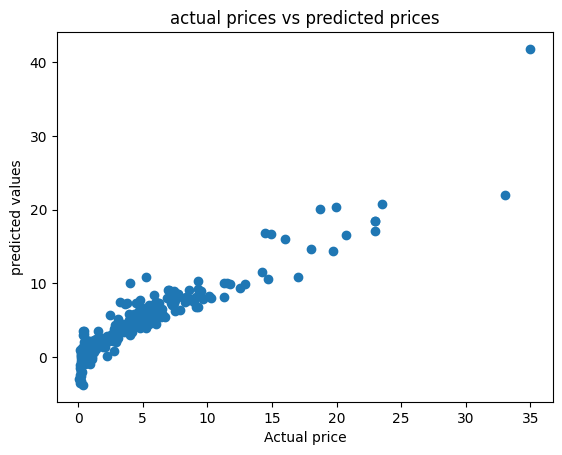

In [42]:
plt.scatter(y_train,x_train_pediction)
plt.xlabel('Actual price')
plt.ylabel('predicted values')
plt.title('actual prices vs predicted prices')
plt.show()

In [43]:
#evaluation of test data
x_test_predict=lin_reg_model.predict(x_test)

In [44]:
# R square of test data
error_test_score=metrics.r2_score(x_test_predict,y_test)
print(error_test_score)

0.8062199941176358


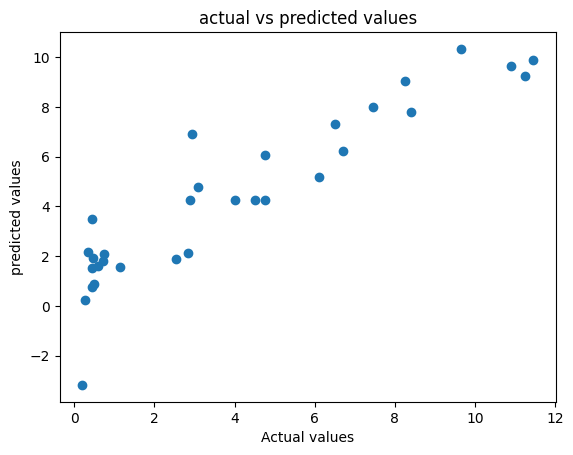

In [46]:
plt.scatter(y_test,x_test_predict)
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('actual vs predicted values')
plt.show()

Lasso model

In [47]:
model=Lasso()

In [48]:
model.fit(x_train,y_train)

Lasso()

In [50]:
#evaluation on training data
x_train_predict=model.predict(x_train)

In [52]:
#R Square error
x_lasso_error=metrics.r2_score(y_train,x_train_predict)
print(x_lasso_error)

0.8427856123435794


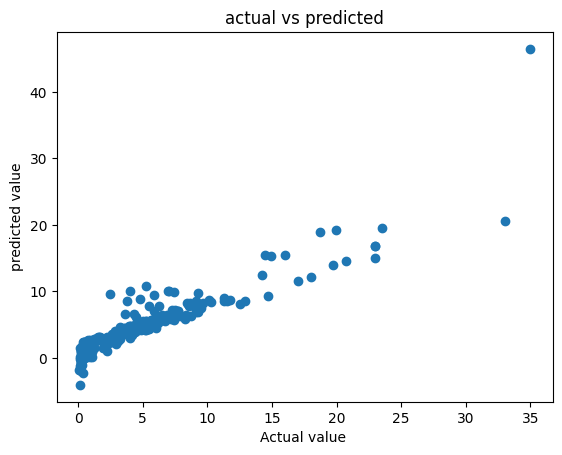

In [53]:
plt.scatter(y_train,x_train_predict)
plt.xlabel('Actual value ')
plt.ylabel('predicted value')
plt.title('actual vs predicted')
plt.show()

In [54]:
#evaluation of testing data
x_test_predict=model.predict(x_test)

In [55]:
#R square error value
x_lasso_test_error=metrics.r2_score(y_test,x_test_predict)
print(x_lasso_test_error)

0.8709167941173195


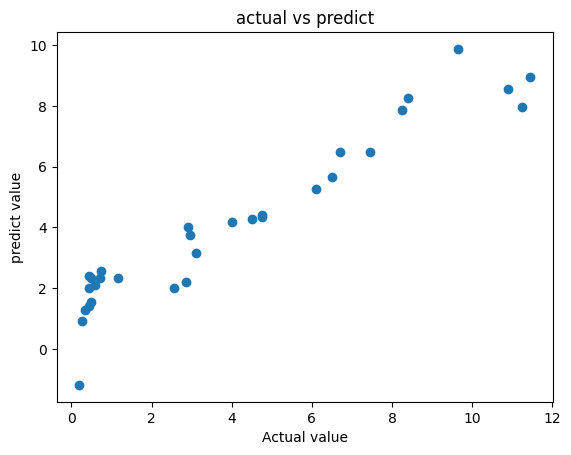

In [56]:
plt.scatter(y_test,x_test_predict)
plt.xlabel('Actual value')
plt.ylabel('predict value')
plt.title('actual vs predict')
plt.show()